In [2]:
import pandas as pd
import gensim
from gensim.test.utils import datapath
import numpy as np
from tqdm import tqdm
from pathlib import Path
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

## Load the dataset

In [3]:
document_dataset = pd.read_csv("../Data/clean/doc.train.csv", sep=',', index_col=0, header=0 )
document_dataset.ABSTRACT = document_dataset.ABSTRACT.apply(eval)
document_dataset.TITLE = document_dataset.TITLE.apply(eval)

document_dataset.head()

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,URL,TITLE,ABSTRACT
ID,,,
MED-10,http://www.ncbi.nlm.nih.gov/pubmed/25329299,"[statin, breast, cancer, surviv, nationwid, co...","[recent, studi, suggest, statin, establish, dr..."
MED-1000,http://www.ncbi.nlm.nih.gov/pubmed/23151181,"[neurobehavior, function, level, exposur, brom...","[background, anim, vitro, studi, demonstr, neu..."
MED-1002,http://www.ncbi.nlm.nih.gov/pubmed/21830753,"[polybromin, diphenyl, ether, pbdes, hydroxyl,...","[prenat, exposur, polybromin, diphenyl, ether,..."
MED-1003,http://www.ncbi.nlm.nih.gov/pubmed/23154064,"[utero, childhood, polybromin, diphenyl, ether...","[background, california, children, exposur, po..."
MED-1004,http://www.ncbi.nlm.nih.gov/pubmed/20019900,"[diet, contribut, signific, bodi, burden, pbde...","[background, exposur, popul, polybromin, diphe..."


In [4]:
document_dataset_val = pd.read_csv("../Data/clean/doc.dev.csv", sep=',', index_col=0, header=0 )
document_dataset_val.ABSTRACT = document_dataset_val.ABSTRACT.apply(eval)
document_dataset_val.TITLE = document_dataset_val.TITLE.apply(eval)

document_dataset_val.head()

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,URL,TITLE,ABSTRACT
ID,,,
MED-1000,http://www.ncbi.nlm.nih.gov/pubmed/23151181,"[neurobehavior, function, level, exposur, brom...","[background, anim, vitro, studi, demonstr, neu..."
MED-1002,http://www.ncbi.nlm.nih.gov/pubmed/21830753,"[polybromin, diphenyl, ether, pbdes, hydroxyl,...","[prenat, exposur, polybromin, diphenyl, ether,..."
MED-1003,http://www.ncbi.nlm.nih.gov/pubmed/23154064,"[utero, childhood, polybromin, diphenyl, ether...","[background, california, children, exposur, po..."
MED-1004,http://www.ncbi.nlm.nih.gov/pubmed/20019900,"[diet, contribut, signific, bodi, burden, pbde...","[background, exposur, popul, polybromin, diphe..."
MED-1097,http://www.ncbi.nlm.nih.gov/pubmed/10493314,"[mose, maimonid, mediev, physician, scholar, p...","[mose, maimonid, physician, philosoph, greates..."


In [22]:
document_dataset_test = pd.read_csv("../Data/clean/doc.test.csv", sep=',', index_col=0, header=0 )
document_dataset_test.ABSTRACT = document_dataset_test.ABSTRACT.apply(eval)
document_dataset_test.TITLE = document_dataset_test.TITLE.apply(eval)

document_dataset_test.head()

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,URL,TITLE,ABSTRACT
ID,,,
MED-10,http://www.ncbi.nlm.nih.gov/pubmed/25329299,"[statin, breast, cancer, surviv, nationwid, co...","[recent, studi, suggest, statin, establish, dr..."
MED-1000,http://www.ncbi.nlm.nih.gov/pubmed/23151181,"[neurobehavior, function, level, exposur, brom...","[background, anim, vitro, studi, demonstr, neu..."
MED-1002,http://www.ncbi.nlm.nih.gov/pubmed/21830753,"[polybromin, diphenyl, ether, pbdes, hydroxyl,...","[prenat, exposur, polybromin, diphenyl, ether,..."
MED-1003,http://www.ncbi.nlm.nih.gov/pubmed/23154064,"[utero, childhood, polybromin, diphenyl, ether...","[background, california, children, exposur, po..."
MED-1004,http://www.ncbi.nlm.nih.gov/pubmed/20019900,"[diet, contribut, signific, bodi, burden, pbde...","[background, exposur, popul, polybromin, diphe..."


In [23]:
document_dataset_all = pd.read_csv("../Data/clean/doc.all.csv", sep=',', index_col=0, header=0 )
document_dataset_all.ABSTRACT = document_dataset_all.ABSTRACT.apply(eval)
document_dataset_all.TITLE = document_dataset_all.TITLE.apply(eval)

document_dataset_all.head()

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,URL,TITLE,ABSTRACT
ID,,,
MED-2,http://www.ncbi.nlm.nih.gov/pubmed/22809476,"[statist, regress, model, estim, acrylamid, co...","[human, exposur, acrylamid, consumpt, french, ..."
MED-3,http://www.ncbi.nlm.nih.gov/pubmed/19158207,"[chronic, intak, potato, chip, human, increas,...","[background, high, concentr, acrylamid, common..."
MED-4,http://www.ncbi.nlm.nih.gov/pubmed/23651876,"[dietari, pattern, breast, cancer, risk, women...","[object, breast, cancer, common, type, cancer,..."
MED-5,http://www.ncbi.nlm.nih.gov/pubmed/16332665,"[empir, deriv, dietari, pattern, risk, postmen...","[background, inconsist, associ, report, diet, ..."
MED-6,http://www.ncbi.nlm.nih.gov/pubmed/23335051,"[consumpt, deep, fri, food, risk, prostat, can...","[background, evid, suggest, high, heat, cook, ..."


## Bag of words on the dataset¶

In [24]:
# Create a dictionary containing the number of times a word appears in the abstract
word_count_dictionary = gensim.corpora.Dictionary(document_dataset.TITLE.values + document_dataset.ABSTRACT.values)
word_count_dictionary_val = gensim.corpora.Dictionary(document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values)
word_count_dictionary_all = gensim.corpora.Dictionary(document_dataset_all.TITLE.values + document_dataset_all.ABSTRACT.values)
word_count_dictionary_test = gensim.corpora.Dictionary(document_dataset_test.TITLE.values + document_dataset_test.ABSTRACT.values)

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
'''
Checking dictionary created
'''
count = 0
for k, v in word_count_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 adher
1 adjust
2 affect
3 associ
4 base
5 benefit
6 bias
7 breast
8 cancer
9 cardiovascular
10 case


C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [word_count_dictionary.doc2bow(doc) for doc in document_dataset.ABSTRACT.values]
bow_corpus_val = [word_count_dictionary.doc2bow(doc) for doc in document_dataset_val.ABSTRACT.values]
bow_corpus_all = [word_count_dictionary.doc2bow(doc) for doc in document_dataset_all.ABSTRACT.values]
bow_corpus_test = [word_count_dictionary.doc2bow(doc) for doc in document_dataset_test.ABSTRACT.values]

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 1
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     word_count_dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 3 ("associ") appears 3 time.
Word 17 ("decreas") appears 2 time.
Word 28 ("effect") appears 4 time.
Word 31 ("evalu") appears 1 time.
Word 36 ("group") appears 2 time.
Word 45 ("method") appears 1 time.
Word 50 ("observ") appears 1 time.
Word 57 ("prevent") appears 1 time.
Word 63 ("regress") appears 1 time.
Word 70 ("studi") appears 3 time.
Word 74 ("test") appears 2 time.
Word 83 ("year") appears 2 time.
Word 84 ("account") appears 1 time.
Word 85 ("addit") appears 1 time.
Word 86 ("adolesc") appears 1 time.
Word 87 ("analysi") appears 1 time.
Word 88 ("anim") appears 2 time.
Word 89 ("appear") appears 1 time.
Word 90 ("assess") appears 1 time.
Word 91 ("averag") appears 2 time.
Word 92 ("background") appears 1 time.
Word 93 ("belgium") appears 1 time.
Word 94 ("biomark") appears 1 time.
Word 95 ("biomonitor") appears 1 time.
Word 96 ("blood") appears 1 time.
Word 97 ("bromin") appears 4 time.
Word 98 ("chemic") appears 1 time.
Word 99 ("cognit") appears 1 time.
Word 100 ("colle

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA weight files

In [9]:
# Define the path of the (to be) saved
temp_file = (".\\lda_weights")
Path(temp_file).mkdir(parents=True, exist_ok=True)
temp_file = temp_file + "\lda_model.trained"

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \l
<>:4: DeprecationWarning: invalid escape sequence \l
<>:4: DeprecationWarning: invalid escape sequence \l
<ipython-input-9-477f9452e9c0>:4: DeprecationWarning: invalid escape sequence \l
  temp_file = temp_file + "\lda_model.trained"


# Train a LDA model

In [10]:
bow_corpus

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 7),
  (8, 9),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 3),
  (20, 1),
  (21, 2),
  (22, 4),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 3),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 4),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 11),
  (70, 2),
  (71, 2),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 3),
  (82, 1),
  (83, 2)],
 [(3, 3),
  (17, 2),
  (28, 4),
  (31, 1),
  (36, 2),
  (45, 1),
  (50, 1),
  (57, 1),
  (63, 1

## Find the best number of groups

In [32]:
#default alpha and beta
testing_groups = [2, 3, 4, 5 ,6 ,7, 8, 9, 10, 20 ]
testing_groups = [*range(1, 21)]
c_v = []
c_u_mass = []
perplexity = []
for group in tqdm(testing_groups):
    # Fit the lda model
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = group, 
                                       id2word = word_count_dictionary,                                    
                                       passes = 10,
                                       workers = 4,
                                       random_state=100,
                                            alpha = 0.1,
                                            eta = 0.01
                                           )
    
    # Create empty dataset
#     lda_groups = pd.DataFrame(index=document_dataset.index, columns=[doc[0] for doc in lda_model.print_topics()])
#     # Set each index witht he topic probabilities
#     for index, bow_item in tqdm(enumerate(bow_corpus), total=len(bow_corpus)):
#         for value in lda_model[bow_item]:
#             lda_groups.iloc[index][value[0]] =  value[1]
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         corpus=bow_corpus_val,
                                         texts=document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values,
                                         dictionary=word_count_dictionary_val, coherence='c_v')
    c_v.append(coherence_model_lda.get_coherence())
    coherence_model_lda_c_umas = CoherenceModel(model=lda_model,
                                                texts=document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values,
                                                corpus=bow_corpus_val, 
                                                dictionary=word_count_dictionary_val,
                                                coherence='u_mass')
    c_u_mass.append(coherence_model_lda_c_umas.get_coherence())
    perplexity.append(lda_model.log_perplexity(bow_corpus_val))  # a measure of how good the model is. lower the better.

    

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [10:25<00:00, 31.29s/it]


C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


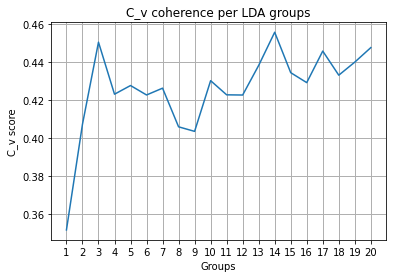

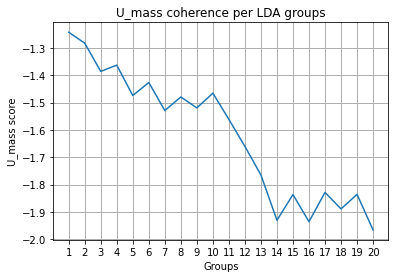

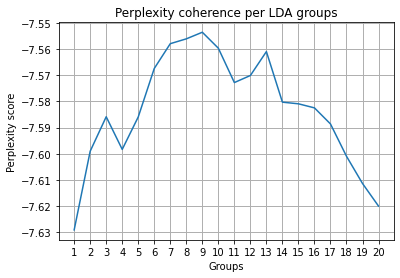

In [34]:
plt.grid(linestyle='-', linewidth=1)

plt.plot(c_v)
plt.title('C_v coherence per LDA groups')
plt.xticks(range(len(testing_groups)),labels=testing_groups)
plt.xlabel('Groups')
plt.ylabel('C_v score')
plt.show()

plt.grid(linestyle='-', linewidth=1)
plt.plot(c_u_mass)
plt.title('U_mass coherence per LDA groups')
plt.xticks(range(len(testing_groups)),labels=testing_groups)
plt.xlabel('Groups')
plt.ylabel('U_mass score')
plt.show()

plt.grid(linestyle='-', linewidth=1)
plt.plot(perplexity)
plt.title('Perplexity coherence per LDA groups')
plt.xticks(range(len(testing_groups)),labels=testing_groups)
plt.xlabel('Groups')
plt.ylabel('Perplexity score')
plt.show()

## Test group numbers for alpha value 0.1 and eta 0.

In [65]:
ideal_model_clusters = 14

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = [0.01, 0.1, 0.31, 0.61, 0.99]
beta.append('symmetric')

a_val_results = []
beta

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.01, 0.1, 0.31, 0.61, 0.99, 'symmetric']

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:23<00:00, 33.88s/it]


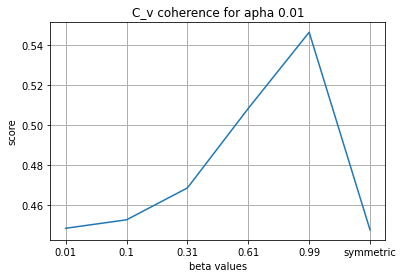

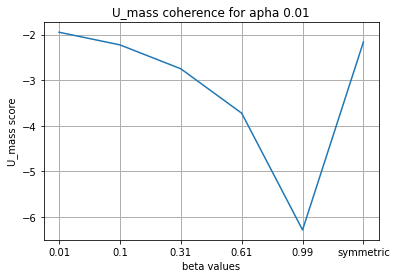

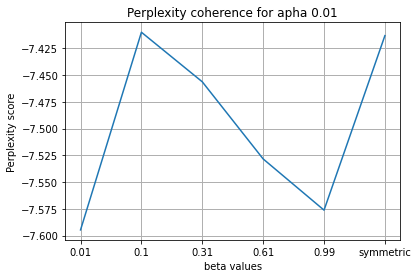

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:28<00:00, 34.72s/it]


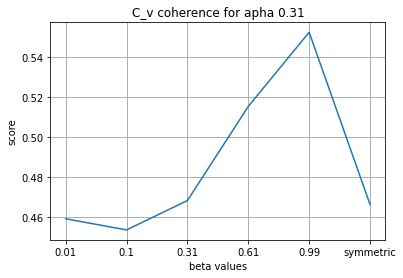

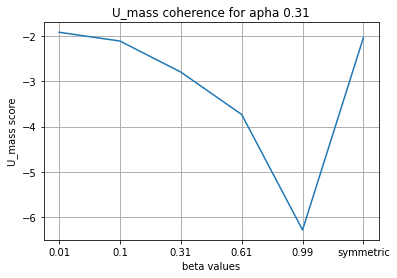

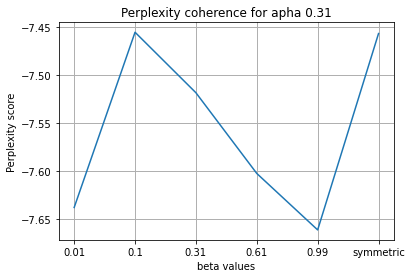

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:32<00:00, 35.48s/it]


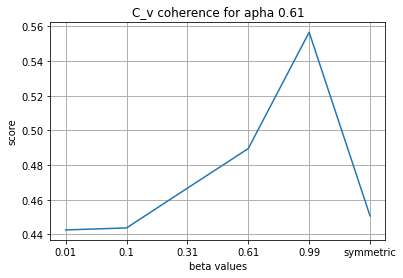

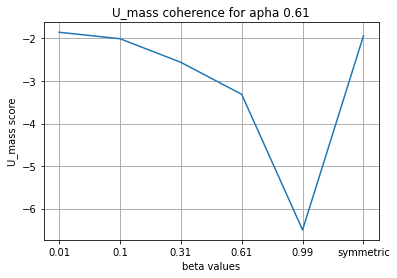

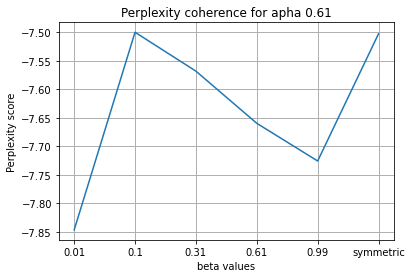

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:21<00:00, 33.59s/it]


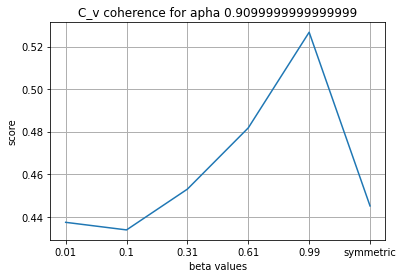

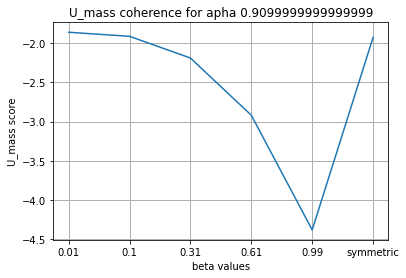

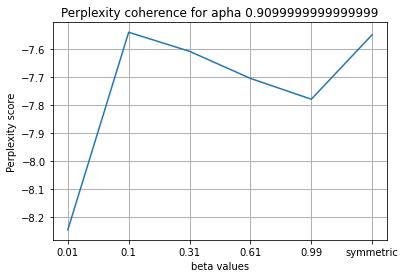

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:16<00:00, 32.83s/it]


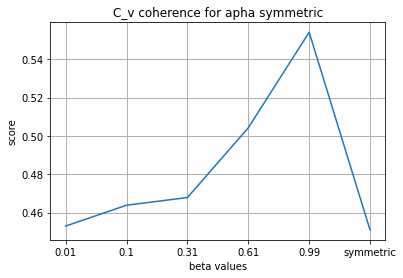

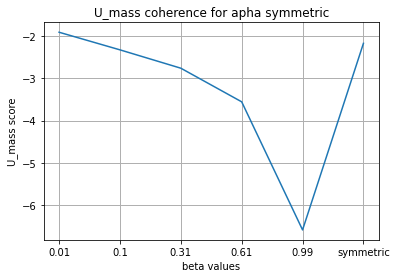

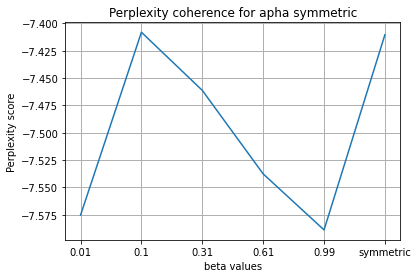

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:14<00:00, 32.44s/it]


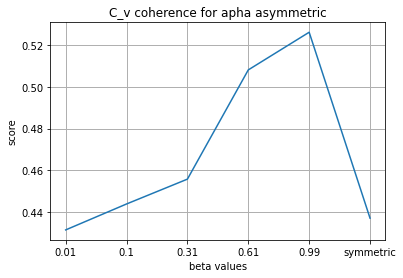

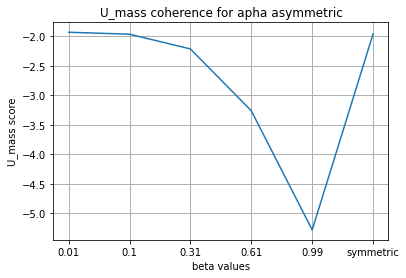

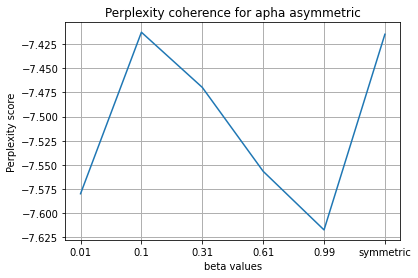

In [66]:
cv_results = {}
umass_results = {}
perplexity_results = {}
for a_val in alpha:
    a_c_v = []
    a_c_u_mass = []
    a_perprexity = []
    for b_val in tqdm(beta):
        lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = ideal_model_clusters, 
                                       id2word = word_count_dictionary,                                    
                                       passes = 10,
                                       workers = 7, 
                                       alpha = a_val,
                                       eta = b_val,
                                       random_state=100)
        coherence_model_lda = CoherenceModel(model=lda_model, 
                                             corpus=bow_corpus_val,
                                             texts=document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values,  
                                             dictionary=word_count_dictionary_val,
                                             coherence='c_v')
        a_c_v.append(coherence_model_lda.get_coherence())

        coherence_model_lda_c_umas = CoherenceModel(model=lda_model,
                                                    texts=document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values,
                                                    corpus=bow_corpus_val, dictionary=word_count_dictionary_val,
                                                    coherence='u_mass')
        a_c_u_mass.append(coherence_model_lda_c_umas.get_coherence())
        a_perprexity.append(lda_model.log_perplexity(bow_corpus_val)) 
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(a_c_v)
    plt.title(f'C_v coherence for apha {a_val}')
    plt.xticks(range(len(beta)),labels=beta)
    plt.xlabel('beta values')
    plt.ylabel('score')
    plt.show()

    plt.grid(linestyle='-', linewidth=1)
    plt.plot(a_c_u_mass)
    plt.title(f'U_mass coherence for apha {a_val}')
    plt.xticks(range(len(beta)),labels=beta)
    plt.xlabel('beta values')
    plt.ylabel('U_mass score')
    plt.show()

    plt.grid(linestyle='-', linewidth=1)
    plt.plot(a_perprexity)
    plt.title(f'Perplexity coherence for apha {a_val}')
    plt.xticks(range(len(beta)),labels=beta)
    plt.xlabel('beta values')
    plt.ylabel('Perplexity score')
    plt.show()
    cv_results[a_val] = a_c_v
    umass_results[a_val] = a_c_u_mass
    perplexity_results[a_val] = a_perprexity

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


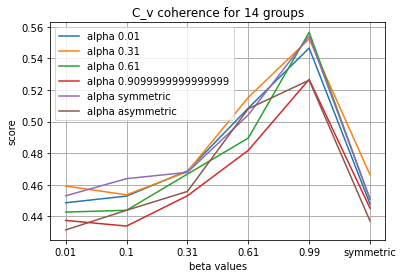

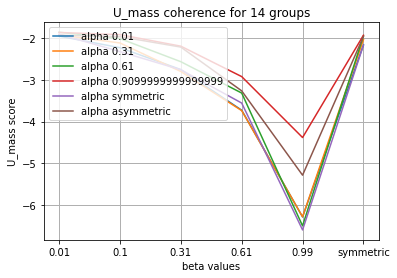

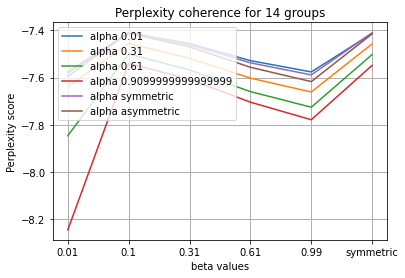

In [67]:
for val in cv_results:
    plt.plot(cv_results[val], label=f"alpha {val}")

plt.plot(cv_results[val], label=f"alpha {val}", zorder=2)
plt.grid(linestyle='-', linewidth=1)
plt.title(f'C_v coherence for {ideal_model_clusters} groups')
plt.xticks(range(len(beta)),labels=beta)
plt.xlabel('beta values')
plt.ylabel('score')
plt.legend(loc="upper left")
plt.show()

for val in umass_results:
    plt.plot(umass_results[val], label=f"alpha {val}")

plt.plot(umass_results[val], label=f"alpha {val}", zorder=2)
plt.grid(linestyle='-', linewidth=1)
plt.title(f'U_mass coherence for {ideal_model_clusters} groups')
plt.xticks(range(len(beta)),labels=beta)
plt.xlabel('beta values')
plt.ylabel('U_mass score')
plt.legend(loc="upper left")
plt.show()
    
for val in perplexity_results:
    plt.plot(perplexity_results[val], label=f"alpha {val}")

plt.grid(linestyle='-', zorder=2)
plt.title(f'Perplexity coherence for {ideal_model_clusters} groups')
plt.xticks(range(len(beta)),labels=beta)
plt.xlabel('beta values')
plt.ylabel('Perplexity score')
plt.legend(loc="upper left")
plt.show()


## Double check to find best group with ideal values

### With apha asymmetric and beta 0.99

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

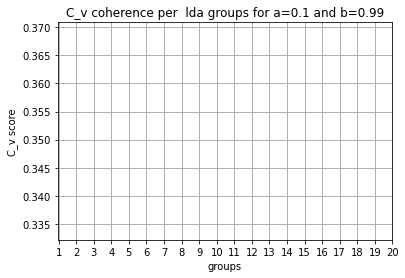

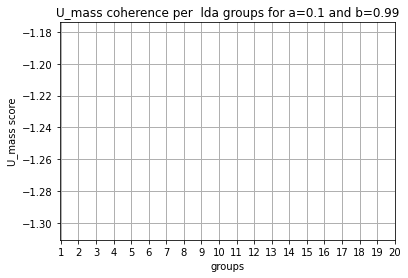

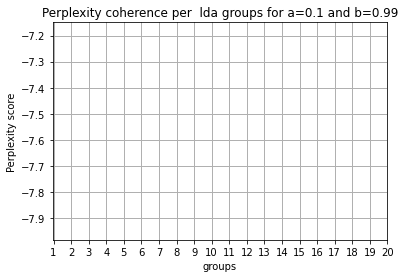

  5%|████▏                                                                              | 1/20 [00:12<04:02, 12.77s/it]

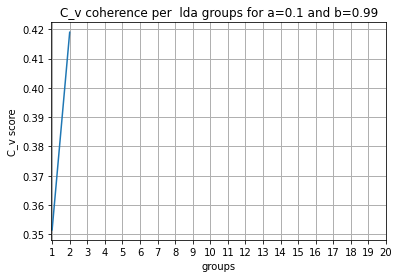

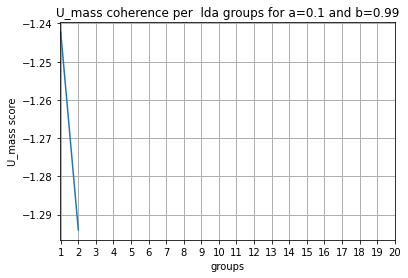

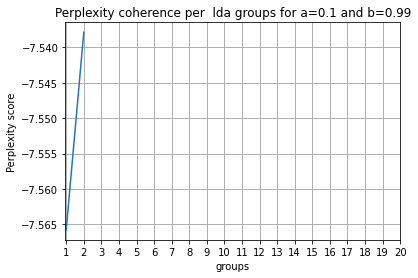

 10%|████████▎                                                                          | 2/20 [01:13<10:59, 36.66s/it]


KeyboardInterrupt: 

In [62]:
testing_groups = [2, 3, 4, 5 ,6 ,7, 8, 9, 10, 20 ]
testing_groups = [*range(1, 21)]
c_v = []
c_u_mass = []
perplexity = []
for group in tqdm(testing_groups):
    # Fit the lda model
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = group, 
                                       id2word = word_count_dictionary,                                    
                                       passes = 10,
                                       workers = 4,
                                       random_state=100,
                                            alpha = "symmetric",
                                            eta = 0.99
                                           )
    
    # Create empty dataset
#     lda_groups = pd.DataFrame(index=document_dataset.index, columns=[doc[0] for doc in lda_model.print_topics()])
#     # Set each index witht he topic probabilities
#     for index, bow_item in tqdm(enumerate(bow_corpus), total=len(bow_corpus)):
#         for value in lda_model[bow_item]:
#             lda_groups.iloc[index][value[0]] =  value[1]
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         corpus=bow_corpus_val,
                                         texts=document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values,
                                         dictionary=word_count_dictionary_val,
                                         coherence='c_v')
    c_v.append(coherence_model_lda.get_coherence())
    coherence_model_lda_c_umas = CoherenceModel(model=lda_model,
                                                texts=document_dataset_val.TITLE.values + document_dataset_val.ABSTRACT.values,
                                                corpus=bow_corpus_val,
                                                dictionary=word_count_dictionary_val, 
                                                coherence='u_mass')
    c_u_mass.append(coherence_model_lda_c_umas.get_coherence())
    perplexity.append(lda_model.log_perplexity(bow_corpus_val))  # a measure of how good the model is. lower the better.
    plt.grid(linestyle='-', linewidth=1)

    plt.plot(c_v)
    plt.title('C_v coherence per  lda groups for a=0.1 and b=0.99')
    plt.xticks(range(len(testing_groups)),labels=testing_groups)
    plt.xlabel('groups')
    plt.ylabel('C_v score')
    plt.show()

    plt.grid(linestyle='-', linewidth=1)
    plt.plot(c_u_mass)
    plt.title('U_mass coherence per  lda groups for a=0.1 and b=0.99')
    plt.xticks(range(len(testing_groups)),labels=testing_groups)
    plt.xlabel('groups')
    plt.ylabel('U_mass score')
    plt.show()

    plt.grid(linestyle='-', linewidth=1)
    plt.plot(perplexity)
    plt.title('Perplexity coherence per  lda groups for a=0.1 and b=0.99')
    plt.xticks(range(len(testing_groups)),labels=testing_groups)
    plt.xlabel('groups')
    plt.ylabel('Perplexity score')
    plt.show()

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


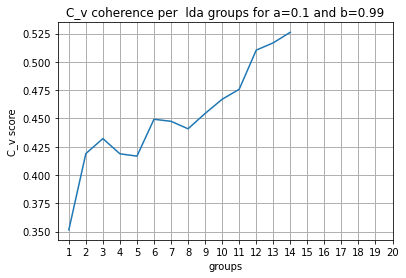

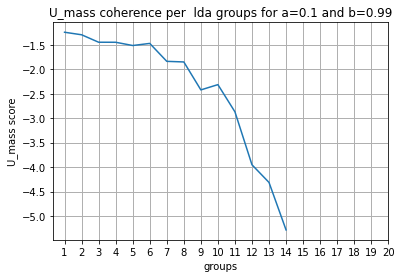

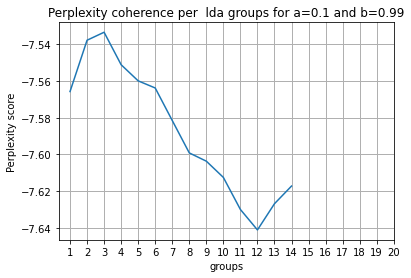

In [61]:
plt.grid(linestyle='-', linewidth=1)

plt.plot(c_v)
plt.title('C_v coherence per  lda groups for a=0.1 and b=0.99')
plt.xticks(range(len(testing_groups)),labels=testing_groups)
plt.xlabel('groups')
plt.ylabel('C_v score')
plt.show()

plt.grid(linestyle='-', linewidth=1)
plt.plot(c_u_mass)
plt.title('U_mass coherence per  lda groups for a=0.1 and b=0.99')
plt.xticks(range(len(testing_groups)),labels=testing_groups)
plt.xlabel('groups')
plt.ylabel('U_mass score')
plt.show()

plt.grid(linestyle='-', linewidth=1)
plt.plot(perplexity)
plt.title('Perplexity coherence per  lda groups for a=0.1 and b=0.99')
plt.xticks(range(len(testing_groups)),labels=testing_groups)
plt.xlabel('groups')
plt.ylabel('Perplexity score')
plt.show()

## Make fancy cluster plot of the best model

In [ ]:
ideal_model_clusters = 17


lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = ideal_model_clusters, 
                                   id2word = word_count_dictionary,                                    
                                   passes = 10,
                                   workers = 4,
                                        alpha = "symmetric",
                                        eta = 0.99
                                       )

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, word_count_dictionary)
vis

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.123636  0.054744       1        1  24.602352
3      0.031404 -0.060377       2        1  23.495583
0      0.073107  0.021204       3        1  18.457525
6      0.038652  0.002706       4        1  15.183594
1     -0.033014 -0.121223       5        1  14.004811
2     -0.062599  0.065332       6        1   3.141494
4     -0.171186  0.037615       7        1   1.114640, topic_info=          Term         Freq        Total Category  logprob  loglift
1566      cell  1457.000000  1457.000000  Default  30.0000  30.0000
275      intak  2413.000000  2413.000000  Default  29.0000  29.0000
261       diet  2164.000000  2164.000000  Default  28.0000  28.0000
65        risk  3220.000000  3220.000000  Default  27.0000  27.0000
1589   protein   794.000000   794.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
70       studi     4.252348  4289.608779   Topic7  -6.9950  -2.4198
350   antibiot     3.488180   107.866354   Topic7  -7.1930   1.0651
1672    cultur     3.400397   177.049532   Topic7  -7.2185   0.5441
181       find     3.475660  1289.623621   Topic7  -7.1966  -1.4197
25      diseas     3.413976  1908.452514   Topic7  -7.2146  -1.8295

[525 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1312      1  0.152653  acid
1312      2  0.310823  acid
1312      3  0.102075  acid
1312      4  0.133341  acid
1312      5  0.203231  acid
...     ...       ...   ...
7663      2  0.108452  αgal
7663      3  0.108452  αgal
7663      4  0.108452  αgal
7663      5  0.108452  αgal
7663      6  0.433807  αgal

[2543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 7, 2, 3, 5])

In [21]:
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     corpus=bow_corpus_test,
                                     texts=document_dataset_test.TITLE.values + document_dataset_test.ABSTRACT.values,
                                     dictionary=word_count_dictionary_test,
                                     coherence='c_v')
print("C_v score: ", coherence_model_lda.get_coherence())
coherence_model_lda_c_umas=CoherenceModel(model=lda_model,
                                            texts=document_dataset_test.TITLE.values + document_dataset_test.ABSTRACT.values,
                                            corpus=bow_corpus_test,
                                            dictionary=word_count_dictionary_test, 
                                            coherence='u_mass')
print("U_mass score: ",(coherence_model_lda_c_umas.get_coherence()))


C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 13445

### Save the weights of this best model

In [19]:
# Define the path of the (to be) saved
temp_file = (".\\lda_weights")
Path(temp_file).mkdir(parents=True, exist_ok=True)
temp_file = temp_file + "\lda_model.trained"

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \l
<>:4: DeprecationWarning: invalid escape sequence \l
<>:4: DeprecationWarning: invalid escape sequence \l
<ipython-input-19-477f9452e9c0>:4: DeprecationWarning: invalid escape sequence \l
  temp_file = temp_file + "\lda_model.trained"


In [20]:
# save the trained model
lda_model.save(temp_file)


C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LDA validation

## Create LDA dataset

In [21]:
lda_model = gensim.models.LdaMulticore.load(temp_file)

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
lda_groups = pd.DataFrame(index=document_dataset_all.index, columns=[doc[0] for doc in lda_model.print_topics()])

for index, bow_item in tqdm(enumerate(bow_corpus_all), total=len(bow_corpus_all)):
    for value in lda_model[bow_item]:
        lda_groups.iloc[index][value[0]] =  value[1]
    
    
lda_groups.to_csv('../Data/clean/document_lda_groups.train.csv')


C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|█████████████████████████████████████████████████████████████████████████████| 5371/5371 [00:05<00:00, 951.00it/s]


## Save file with LDA_weights information per group

In [29]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
list_of_topics = []

for idx, topic in lda_model.print_topics(-1):
    list_of_topics.append("Topic: {} \nWords: {}".format(idx, topic ))
for topic in list_of_topics:
    print(topic)

Topic: 0 
Words: 0.004*"mercuri" + 0.004*"arsenic" + 0.003*"fish" + 0.002*"metal" + 0.002*"medicin" + 0.001*"hair" + 0.001*"tradit" + 0.001*"tuna" + 0.001*"herbal" + 0.001*"prepar"
Topic: 1 
Words: 0.025*"risk" + 0.019*"cancer" + 0.018*"studi" + 0.013*"intak" + 0.011*"associ" + 0.010*"year" + 0.009*"consumpt" + 0.009*"increas" + 0.009*"women" + 0.007*"relat"
Topic: 2 
Words: 0.006*"intak" + 0.006*"sperm" + 0.004*"vitamin" + 0.003*"semen" + 0.002*"coffe" + 0.002*"folat" + 0.002*"asthma" + 0.002*"concentr" + 0.002*"studi" + 0.002*"vegetarian"
Topic: 3 
Words: 0.011*"cancer" + 0.009*"breast" + 0.008*"food" + 0.005*"lignan" + 0.005*"acid" + 0.005*"product" + 0.005*"content" + 0.005*"prostat" + 0.005*"studi" + 0.004*"intak"
Topic: 4 
Words: 0.020*"cell" + 0.012*"activ" + 0.011*"effect" + 0.008*"human" + 0.008*"cancer" + 0.007*"induc" + 0.006*"studi" + 0.006*"increas" + 0.006*"inhibit" + 0.005*"show"
Topic: 5 
Words: 0.008*"diseas" + 0.008*"food" + 0.006*"health" + 0.006*"product" + 0.004*"r

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics_df = pd.DataFrame(sorted(lda_model.print_topics(), key=lambda tup: -1*tup[1]))

topics_df 

In [14]:
topics_df = pd.DataFrame(sorted(lda_model.print_topics(), key=lambda tup: -1*tup[1]))
topics_df.rename(columns={0:'Group'}, inplace=True)

topics_df = topics_df.set_index('Group')
new = topics_df[1].str.split("+", expand = True) 
for val in new:
    #column number of val
    topics_df[val+1]= new[val].str.replace("\"", "", case = False).str.replace("\*", "", case = False) 
    
    
topics_df.to_csv('../Data/clean/lda_group_descriptions.csv', header=False, sep=";")
topics_df

C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence \*
<>:8: DeprecationWarning: invalid escape sequence \*
<>:8: DeprecationWarning: invalid escape sequence \*
<ipython-input-14-46f64502a445>:8: DeprecationWarning: invalid escape sequence \*
  topics_df[val+1]= new[val].str.replace("\"", "", case = False).str.replace("\*", "", case = False)


,1,2,3,4,5,6,7,8,9,10
Group,,,,,,,,,,
0,0.004food,0.003milk,0.003meat,0.003pbdes,0.003sampl,0.002concentr,0.002pbde,0.002product,0.002infant,0.002fish
1,0.020cell,0.011activ,0.010effect,0.008human,0.008cancer,0.006antioxid,0.006induc,0.006acid,0.005inhibit,0.005studi
2,0.005platelet,0.004mercuri,0.003hair,0.003concentr,0.002diseas,0.002level,0.002iodin,0.002effect,0.002signific,0.002activ
3,0.002pcdd,0.001detect,0.001sampl,0.001uptak,0.001catfish,0.001cholin,0.001patient,0.001lesion,0.001imag,0.001scan
4,0.006gluten,0.003ncgs,0.002brca,0.002celiac,0.001wheat,0.001gondii,0.001sensit,0.001antibodi,0.001sulfit,0.001patient
5,0.013exposur,0.010children,0.010food,0.006organ,0.006pesticid,0.004studi,0.004sampl,0.004health,0.003level,0.003product
6,0.004curcumin,0.003patient,0.002skin,0.002constip,0.002dri,0.002gout,0.002citrullin,0.001nutrit,0.001mgus,0.001watermelon
7,0.003mrsa,0.002difficil,0.001barn,0.001water,0.001infect,0.001hepat,0.001liver,0.001cerebellar,0.001rutinosid,0.001patient
8,0.006patient,0.006isol,0.005resist,0.004sampl,0.004case,0.003infect,0.003pork,0.003coli,0.003report,0.002mrsa
